# Credit card Exploratory Data Analysis

## Import Libraries

In [1]:
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join('..')))

## Load Modules

In [2]:
from src.data_loader import DataLoader
from src.preprocessor import CreditCardPreprocessor

file_path = "../data/raw"

## Load Data

In [3]:
loader = DataLoader(file_path)
credit_df = loader.load_csv("creditcard.csv")

Loading creditcard.csv...


## Initialize

In [5]:
cc_processor = CreditCardPreprocessor(credit_df)

## EDA

### Distribution of Amount

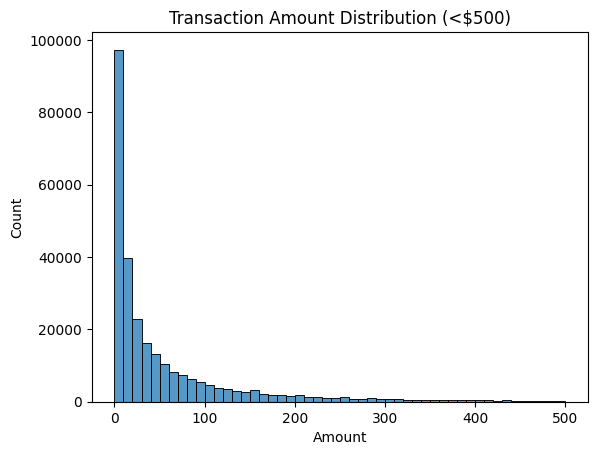

In [6]:
sns.histplot(cc_processor.df[cc_processor.df['Amount'] < 500]['Amount'], bins=50)
plt.title('Transaction Amount Distribution (<$500)')
plt.show()

## Correlation Matrix

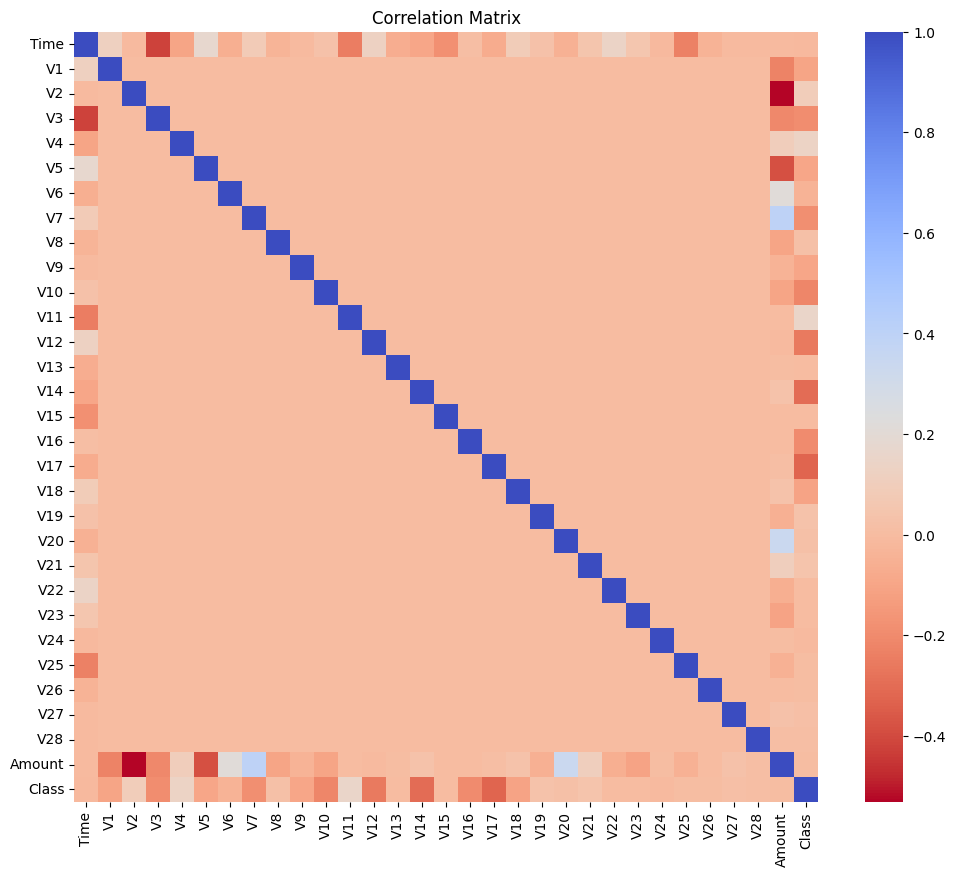

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(cc_processor.df.corr(), cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Correlation Matrix')
plt.show()

## Preprocessing

In [8]:
cc_processor.clean_duplicates()
cc_processor.scale_amount_time()

Dropped 1081 duplicate rows.
Scaling Amount and Time...


## Handling Imbalance

In [9]:
X, y = cc_processor.separate_features_target('Class')
X_resampled, y_resampled = cc_processor.handle_imbalance_smote(X, y)

Original class distribution: Class
0    283253
1       473
Name: count, dtype: int64
Resampled class distribution: Class
0    283253
1    283253
Name: count, dtype: int64


## Save data

In [10]:
cc_processor.df.to_csv('../data/processed/creditcard_processed.csv', index=False)